## Семинар 15: "Обучение с подкреплением 2"

ФИО: Калашников Дмитрий

###  FrozenLake


<img src="http://vignette2.wikia.nocookie.net/riseoftheguardians/images/4/4c/Jack's_little_sister_on_the_ice.jpg/revision/latest?cb=20141218030206" alt="a random image to attract attention" style="width: 400px;"/>



In [1]:
import gym
import numpy as np 
import random

#create a single game instance
env = gym.make("FrozenLake-v0")

#start new game
env.reset();

In [2]:
# display the game state
env.render()


SFFF
FHFH
FFFH
HFFG


### legend

![img](https://cdn-images-1.medium.com/max/800/1*MCjDzR-wfMMkS0rPqXSmKw.png)

## Задание 1.
Подберите значения alpha и epsilon и найдите приближение оптимальной Q-функции для Frozen Lake.

In [7]:
class QLearn:
    def __init__(self, actions, epsilon=0.1, alpha=0.2, gamma=0.9):
        self.q = {}
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma
        self.actions = actions

    def getQ(self, state, action):
        return self.q.get((state, action), 0.0)

    def learnQ(self, state, action, reward, value):
        oldv = self.q.get((state, action), None)

        if oldv is None:
            self.q[(state, action)] = reward
        else:
            self.q[(state, action)] = oldv + self.alpha * (value - oldv)

    def chooseAction(self, state):
        if random.random() < self.epsilon:
            action = random.choice(self.actions)
        else:
            q = [self.getQ(state, a) for a in self.actions]
            maxQ = max(q)
            count = q.count(maxQ)
            if count > 1:
                best = [i for i in range(len(self.actions)) if q[i] == maxQ]
                i = random.choice(best)
            else:
                i = q.index(maxQ)

            action = self.actions[i]
        return action

    def learn(self, state1, action1, reward, state2):
        maxqnew = max([self.getQ(state2, a) for a in self.actions])
        self.learnQ(state1, action1, reward, reward + self.gamma*maxqnew)

In [9]:
def run_episode_qlearn_learn(env, qlearn, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action = qlearn.chooseAction(obs)
        obs_new, reward, done, _ = env.step(action)
        qlearn.learn(obs, action, reward, obs_new)
        obs = obs_new
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [10]:
def run_episode_qlearn(env, qlearn, gamma = 1.0, render = False):
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        action = qlearn.chooseAction(obs)
        obs_new, reward, done, _ = env.step(action)
        obs = obs_new
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [52]:
def evaluate_qlearn(env, qlearn, gamma = 1.0, n = 100):
    scores = [
            run_episode_qlearn(env, qlearn, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [53]:
def qlearning(env, qlearn, gamma = 1.0, render = False, n_epochs=10, verbose=False):
    for epoch in range(n_epochs):
        total_reward = run_episode_qlearn(env, qlearn, gamma, render)
        if verbose and epoch % 100 == 0:
            print(f'reward {total_reward} for {epoch} epochs')

In [54]:
gamma = 1.0
n_epochs = 1000
epsilon = 0.21 # 0.1
alpha = 0.89 # 0.2

In [60]:
import itertools
from tqdm.notebook import tqdm

In [62]:
results = []
for gamma, epsilon, alpha in tqdm(itertools.product( np.linspace(0, 1.0, 5), np.linspace(0, 1.0, 20), np.linspace(0, 1.0, 20) )):
    qlearn = QLearn(actions=range(env.env.nA), gamma=gamma, epsilon=epsilon, alpha=alpha)
    env = gym.make("FrozenLake-v0")
    qlearning(env.env, qlearn, gamma, render=False, n_epochs=n_epochs)
    q_score = evaluate_qlearn(env, qlearn, gamma = gamma, n = 100)
    results.append([q_score, gamma, epsilon, alpha])

In [65]:
sorted(results, reverse=True)[:15]

[[0.05, 1.0, 1.0, 0.10526315789473684],
 [0.05, 1.0, 0.8421052631578947, 0.21052631578947367],
 [0.04, 1.0, 0.9473684210526315, 0.5263157894736842],
 [0.04, 1.0, 0.894736842105263, 0.2631578947368421],
 [0.04, 1.0, 0.894736842105263, 0.05263157894736842],
 [0.04, 1.0, 0.8421052631578947, 0.7368421052631579],
 [0.04, 1.0, 0.7894736842105263, 0.7368421052631579],
 [0.04, 1.0, 0.7894736842105263, 0.631578947368421],
 [0.04, 1.0, 0.6842105263157894, 0.9473684210526315],
 [0.04, 1.0, 0.5263157894736842, 1.0],
 [0.04, 1.0, 0.47368421052631576, 0.5789473684210527],
 [0.04, 1.0, 0.42105263157894735, 0.9473684210526315],
 [0.04, 1.0, 0.3684210526315789, 0.3157894736842105],
 [0.04, 1.0, 0.21052631578947367, 0.894736842105263],
 [0.03, 1.0, 1.0, 0.47368421052631576]]

In [79]:
gamma = 1.0
n_epochs = 1000
epsilon = 0.21
alpha = 0.89

In [80]:
qlearn = QLearn(actions=range(env.env.nA), gamma=gamma, epsilon=epsilon, alpha=alpha)
env = gym.make("FrozenLake-v0")
qlearning(env.env, qlearn, gamma, render=False, n_epochs=n_epochs)
q_score = evaluate_qlearn(env, qlearn, gamma = gamma, n = 100)
q_score

0.05

## Задание 2.
Обучите сеть DQN для среды http://gym.openai.com/envs/Pong-v0/ 

In [3]:
pip install atari-py 

In [4]:
import requests
r = requests.get('http://www.atarimania.com/roms/Roms.rar')
with open('Roms.rar', 'wb') as fout:
    fout.write(r.content)

In [ ]:
!unrar x Roms.rar
!mkdir Roms
!mv ROMS.zip "HC ROMS.zip" Roms
!python -m atari_py.import_roms Roms

### Обработка фреймов на уровне observation

In [6]:
import cv2
import numpy as np
import time
import collections
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda")

In [7]:
class FireResetEnv(gym.Wrapper):
    """ Wrapper for starting the game firstly """
    def __init__(self, env=None):
        super(FireResetEnv, self).__init__(env)

    def step(self, action):
        return self.env.step(action)

    def reset(self):
        self.env.reset()
        obs, _, done, _ = self.env.step(1)
        if done:
            self.env.reset()
        obs, _, done, _ = self.env.step(2)
        if done:
            self.env.reset()
        return obs

In [8]:
class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env=None, skip=4):
        super(MaxAndSkipEnv, self).__init__(env)
        self._obs_buffer = collections.deque(maxlen=2)
        self._skip = skip

    def step(self, action):
        total_reward = 0.0
        done = None
        for _ in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            self._obs_buffer.append(obs)
            total_reward += reward
            if done:
                break
        max_frame = np.max(np.stack(self._obs_buffer), axis=0)
        return max_frame, total_reward, done, info

    def reset(self):
        self._obs_buffer.clear()
        obs = self.env.reset()
        self._obs_buffer.append(obs)
        return obs

In [9]:
class ProcessFrame84(gym.ObservationWrapper):
    def __init__(self, env=None):
        super(ProcessFrame84, self).__init__(env)
        self.observation_space = gym.spaces.Box(low=0, high=255, shape=(84, 84, 1), dtype=np.uint8)

    def observation(self, obs):
        return ProcessFrame84.process(obs)

    @staticmethod
    def process(frame):
        img = np.reshape(frame, [210, 160, 3]).astype(np.float32)
        img = img[:, :, 0] * 0.299 + img[:, :, 1] * 0.587 + img[:, :, 2] * 0.114
        resized_screen = cv2.resize(img, (84, 110), interpolation=cv2.INTER_AREA)
        x_t = resized_screen[18:102, :]
        x_t = np.reshape(x_t, [84, 84, 1])

        return x_t.astype(np.uint8)

In [10]:
class BufferWrapper(gym.ObservationWrapper):
    def __init__(self, env, n_steps, dtype=np.float32):
        super(BufferWrapper, self).__init__(env)
        self.dtype = dtype
        old_space = env.observation_space
        self.observation_space = gym.spaces.Box(old_space.low.repeat(n_steps, axis=0),
                                                old_space.high.repeat(n_steps, axis=0), dtype=dtype)

    def reset(self):
        self.buffer = np.zeros_like(self.observation_space.low, dtype=self.dtype)
        return self.observation(self.env.reset())

    def observation(self, observation):
        self.buffer[:-1] = self.buffer[1:]
        self.buffer[-1] = observation
        return self.buffer

In [11]:
class ImageToPyTorch(gym.ObservationWrapper):
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        old_shape = self.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(old_shape[-1], 
                                old_shape[0], old_shape[1]), dtype=np.float32)

    def observation(self, observation):
        return np.moveaxis(observation, 2, 0)

In [12]:
class ScaledFloatFrame(gym.ObservationWrapper):
    def observation(self, obs):
        return np.array(obs).astype(np.float32) / 255.0

In [13]:
def create_env(env_name):
    env = gym.make(env_name)
    env = MaxAndSkipEnv(env)
    env = FireResetEnv(env)
    env = ProcessFrame84(env)
    env = ImageToPyTorch(env)
    env = BufferWrapper(env, 4)
    return ScaledFloatFrame(env)

### Сеть

In [118]:
class DQN(nn.Module):
    def __init__(self, input_shape, n_actions):
        super(DQN, self).__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=3),
            nn.LayerNorm( (82, 82) ),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3),
            nn.LayerNorm( (80, 80) ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, kernel_size=3),
            nn.LayerNorm( (38, 38) ),
            nn.ReLU(),
            # nn.Conv2d(128, 256, kernel_size=3),
            # nn.LayerNorm( (36, 36) ),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2),
            # nn.Conv2d(256, 512, kernel_size=3),
            # nn.LayerNorm( (16, 16) ),
            # nn.ReLU(),
        )

        conv_out_size = 38 * 38 * 128 #  16 * 16 * 512 

        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 1024), # 512
            nn.ReLU(),
            nn.Linear(1024, n_actions)
        )

    def forward(self, x):
        conv_out = self.conv(x).view(x.size()[0], -1)
        return self.fc(conv_out)

### Классы для объектов из алгоритма

In [120]:
MEAN_REWARD_BOUND = 15.0

gamma = 0.95                
batch_size = 64          
replay_size = 10000            
learning_rate = 1e-4      
sync_target_frames = 10000
replay_start_size = 5000      

eps_start=1.0
eps_decay=.9999
eps_min=0.03

In [121]:
class ExperienceReplay:
    """ Experience Replay buffer for experience sampling from algorithm """
    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)

    def __len__(self):
        return len(self.buffer)

    def append(self, experience):
        self.buffer.append(experience)

    def sample(self, batch_size):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        states, actions, rewards, dones, next_states = zip(*[self.buffer[idx] for idx in indices])
        return np.array(states), np.array(actions), np.array(rewards, dtype=np.float32), \
               np.array(dones, dtype=np.uint8), np.array(next_states)


In [122]:
class Agent:
    """ Agent from algorithm """
    def __init__(self, env, exp_buffer):
        self.env = env
        self.exp_buffer = exp_buffer
        self._reset()

    def _reset(self):
        self.state = self.env.reset()
        self.total_reward = 0.0

    def play_step(self, net, epsilon=0.0, device="cpu"):

        done_reward = None
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            state_a = np.array([self.state], copy=False)
            state_v = torch.tensor(state_a).to(device)
            q_vals_v = net(state_v)
            _, act_v = torch.max(q_vals_v, dim=1)
            action = int(act_v.item())

        new_state, reward, is_done, _ = self.env.step(action)
        self.total_reward += reward

        exp = (self.state, action, reward, is_done, new_state)
        self.exp_buffer.append(exp)
        self.state = new_state

        if is_done:
            done_reward = self.total_reward
            self._reset()
        return done_reward

### Обучаем

In [123]:
def run():

    DEFAULT_ENV_NAME = "Pong-v0"
    env = create_env(DEFAULT_ENV_NAME)

    net = DQN(env.observation_space.shape, env.action_space.n).to(device)
    target_net = DQN(env.observation_space.shape, env.action_space.n).to(device)
    buffer = ExperienceReplay(replay_size)
    agent = Agent(env, buffer)

    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    epsilon = eps_start
    total_rewards = []
    frame_idx = 0  

    best_mean_reward = None
    MAX_GAMES = 30

    while True:
        frame_idx += 1
        epsilon = max(epsilon * eps_decay, eps_min)
        reward = agent.play_step(net, epsilon, device=device)

        if reward is not None:

            total_rewards.append(reward)
            mean_reward = np.mean(total_rewards[-20:])

            if len(total_rewards) % 1 == 0:
                print(f"game {len(total_rewards)} - reward {mean_reward}")

            if best_mean_reward is None or best_mean_reward < mean_reward:
                torch.save(net.state_dict(), DEFAULT_ENV_NAME + "-final.pth")
                best_mean_reward = mean_reward
                if best_mean_reward is not None:
                    print(f"Best mean reward updated {best_mean_reward}")

            if mean_reward > MEAN_REWARD_BOUND:
                break

        if len(buffer) < replay_start_size:
            continue

        batch = buffer.sample(batch_size)
        states, actions, rewards, dones, next_states = batch

        states_v = torch.tensor(states).to(device)
        next_states_v = torch.tensor(next_states).to(device)
        actions_v = torch.tensor(actions).to(device)
        rewards_v = torch.tensor(rewards).to(device)
        done_mask = torch.ByteTensor(dones).to(device)

        state_action_values = net(states_v).gather(1, actions_v.unsqueeze(-1)).squeeze(-1)
        next_state_values = target_net(next_states_v).max(1)[0]
        next_state_values[done_mask] = 0.0
        next_state_values = next_state_values.detach()
        expected_state_action_values = next_state_values * gamma + rewards_v

        loss_t = nn.MSELoss()(state_action_values, expected_state_action_values)

        optimizer.zero_grad()
        loss_t.backward()
        optimizer.step()

        if frame_idx % sync_target_frames == 0:
            target_net.load_state_dict(net.state_dict())
        
        if len(total_rewards) >= MAX_GAMES:
            break
    
    if len(total_rewards) > MAX_GAMES:
        print('Hasnt converged')
    
    return env, target_net

In [124]:
env, target_net = run()

game 1 - reward -21.0
Best mean reward updated -21.0
game 2 - reward -21.0
game 3 - reward -21.0
game 4 - reward -21.0
game 5 - reward -20.8
Best mean reward updated -20.8
game 6 - reward -20.833333333333332
game 7 - reward -20.428571428571427
Best mean reward updated -20.428571428571427
game 8 - reward -20.375
Best mean reward updated -20.375
game 9 - reward -20.444444444444443
game 10 - reward -20.4
game 11 - reward -20.363636363636363
Best mean reward updated -20.363636363636363
game 12 - reward -20.416666666666668
game 13 - reward -20.46153846153846
game 14 - reward -20.428571428571427
game 15 - reward -20.466666666666665
game 16 - reward -20.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/IndexingUtils.h:30.)


game 17 - reward -20.470588235294116
game 18 - reward -20.444444444444443
game 19 - reward -20.473684210526315
game 20 - reward -20.4
game 21 - reward -20.3
Best mean reward updated -20.3
game 22 - reward -20.25
Best mean reward updated -20.25
game 23 - reward -20.15
Best mean reward updated -20.15
game 24 - reward -20.15
game 25 - reward -20.2
game 26 - reward -20.1
Best mean reward updated -20.1
game 27 - reward -20.25
game 28 - reward -20.3
game 29 - reward -20.25
game 30 - reward -20.3


### Тестируем

In [125]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

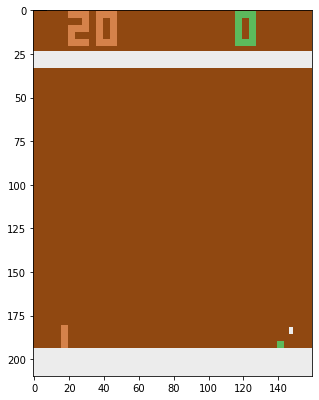

Total reward: -21.00


In [128]:
state = env.reset()
total_reward = 0.0
#net = target_net 
net.load_state_dict(torch.load('Pong-v0-final.pth', map_location=lambda storage, loc: storage))

while True:

    state_v = torch.tensor(np.array([state], copy=False))
    q_vals = net(state_v.to('cuda')).data.cpu().numpy()[0]
    action = np.argmax(q_vals)

    clear_output(True)

    screen = env.render(mode='rgb_array')
    screen = np.ascontiguousarray(screen, dtype=np.float32) / 255
    screen = torch.from_numpy(screen)
    plt.figure(figsize=(5,8))
    plt.imshow(screen.cpu().squeeze(0).numpy(), interpolation='none')
    plt.show()

    #time.sleep(0.01)

    state, reward, done, _ = env.step(action)
    total_reward += reward

    if done:
        break

print("Total reward: %.2f" % total_reward)